<a href="https://colab.research.google.com/github/Lee-Gunju/AI-paper-code-review-for-personal-project/blob/master/Timeseries_classification_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)

In [ ]:
root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"


In [ ]:
x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

In [ ]:
x_train.shape

(3601, 500)

In [ ]:
y_train.shape

(3601,)

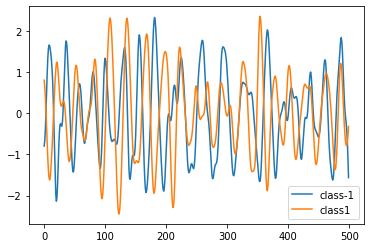

In [ ]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label='class' + str(c))

plt.legend(loc='best')
plt.show()
plt.close()

In [ ]:
x_train.shape

(3601, 500)

In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_train.shape

(3601, 500, 1)

In [ ]:
num_claases = len(np.unique(y_train))

In [ ]:
idx = np.random.permutation(len(x_train))

In [ ]:
x_train = x_train[idx]
y_train = y_train[idx]

In [ ]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

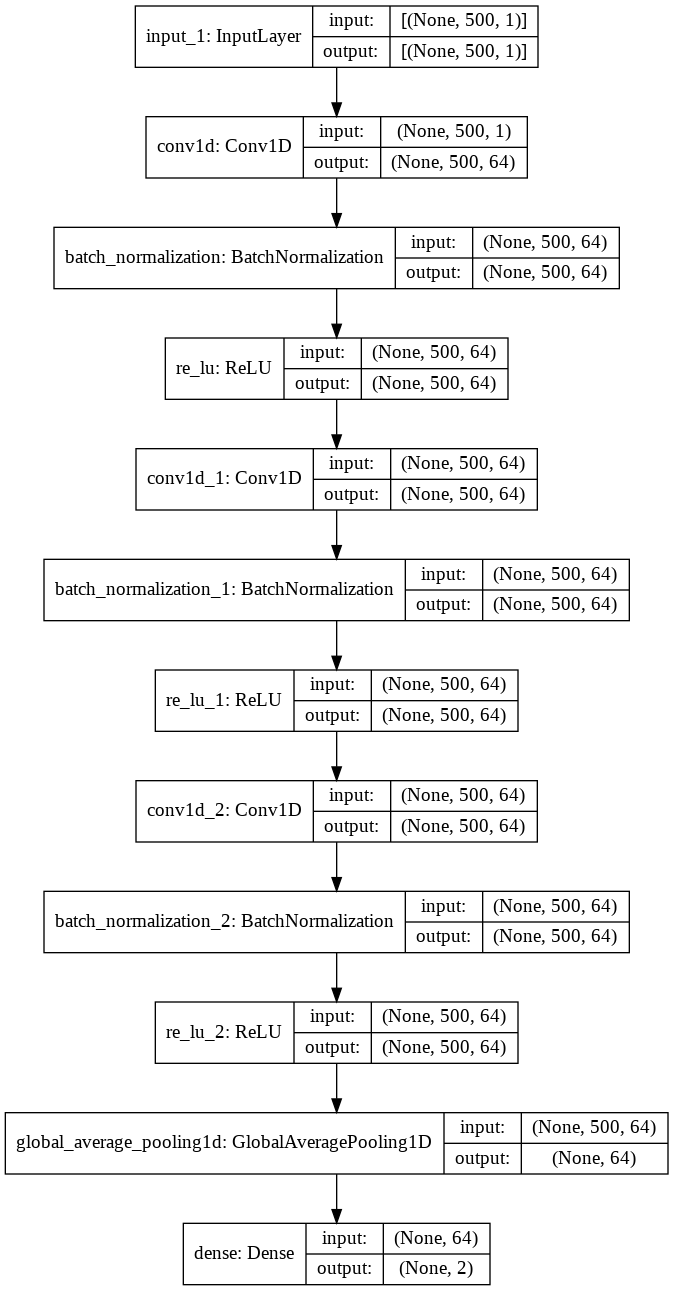

In [ ]:
def make_model(input_shape):
  input_layer = keras.layers.Input(input_shape)

  conv1 = keras.layers.Conv1D(filters =64, kernel_size = 3, padding = 'same')(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)

  conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding='same')(conv1)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv2)

  conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding='same')(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)
  output_layer= keras.layers.Dense(num_claases, activation='softmax')(gap)

  return keras.Model(inputs = input_layer, outputs = output_layer)


model = make_model(input_shape = x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)


In [ ]:
epochs = 500
batch_size = 32

callbacks = [keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss'),
             keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=0.0001),
             keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=1)]

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['sparse_categorical_accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs = epochs, callbacks=callbacks, validation_split=0.2, verbose = 1)

90/90 [==============================] - 1s 7ms/step - loss: 0.2898 - sparse_categorical_accuracy: 0.8698 - val_loss: 0.3761 - val_sparse_categorical_accuracy: 0.8114
Epoch 28/500
90/90 [==============================] - 1s 7ms/step - loss: 0.2951 - sparse_categorical_accuracy: 0.8708 - val_loss: 0.2794 - val_sparse_categorical_accuracy: 0.8918
Epoch 29/500
90/90 [==============================] - 1s 7ms/step - loss: 0.2750 - sparse_categorical_accuracy: 0.8832 - val_loss: 0.3143 - val_sparse_categorical_accuracy: 0.8433
Epoch 30/500
90/90 [==============================] - 1s 7ms/step - loss: 0.2595 - sparse_categorical_accuracy: 0.8973 - val_loss: 0.3246 - val_sparse_categorical_accuracy: 0.8363
Epoch 31/500
90/90 [==============================] - 1s 7ms/step - loss: 0.2655 - sparse_categorical_accuracy: 0.8873 - val_loss: 0.2580 - val_sparse_categorical_accuracy: 0.9001
Epoch 32/500
90/90 [==============================] - 1s 7ms/step - loss: 0.2605 - sparse_categorical_accuracy: 0

In [ ]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

42/42 [==============================] - 0s 3ms/step - loss: 0.0876 - sparse_categorical_accuracy: 0.9697
Test accuracy 0.9696969985961914
Test loss 0.08759386837482452


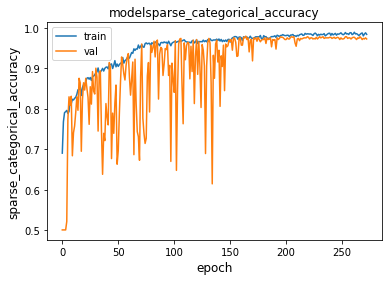

In [ ]:
metric = 'sparse_categorical_accuracy'

plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history['val_' +metric])
plt.title('model'+metric)
plt.ylabel(metric, fontsize= 'large')
plt.xlabel('epoch', fontsize = 'large')
plt.legend(['train', 'val'], loc = 'best')
plt.show()
plt.close()